In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/AndrewwCO/bank-marketing-data/main/bank-full.csv'  # Use raw URL
df = pd.read_csv(url, sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
print(df.shape)

(45211, 17)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df['y'].value_counts()

,count
y,
no,39922
yes,5289


In [7]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [8]:
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

Número de filas duplicadas: 0


In [9]:
cols_cat = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

In [10]:
for col in cols_cat:
  print(f'Columna {col}: {df[col].nunique()} subniveles')

Columna job: 12 subniveles
Columna marital: 3 subniveles
Columna education: 4 subniveles
Columna default: 2 subniveles
Columna housing: 2 subniveles
Columna loan: 2 subniveles
Columna contact: 3 subniveles
Columna month: 12 subniveles
Columna poutcome: 4 subniveles
Columna y: 2 subniveles


In [11]:
cols_num = ['age', 'balance', 'day', 'duration', 'campaign',
            'pdays', 'previous']

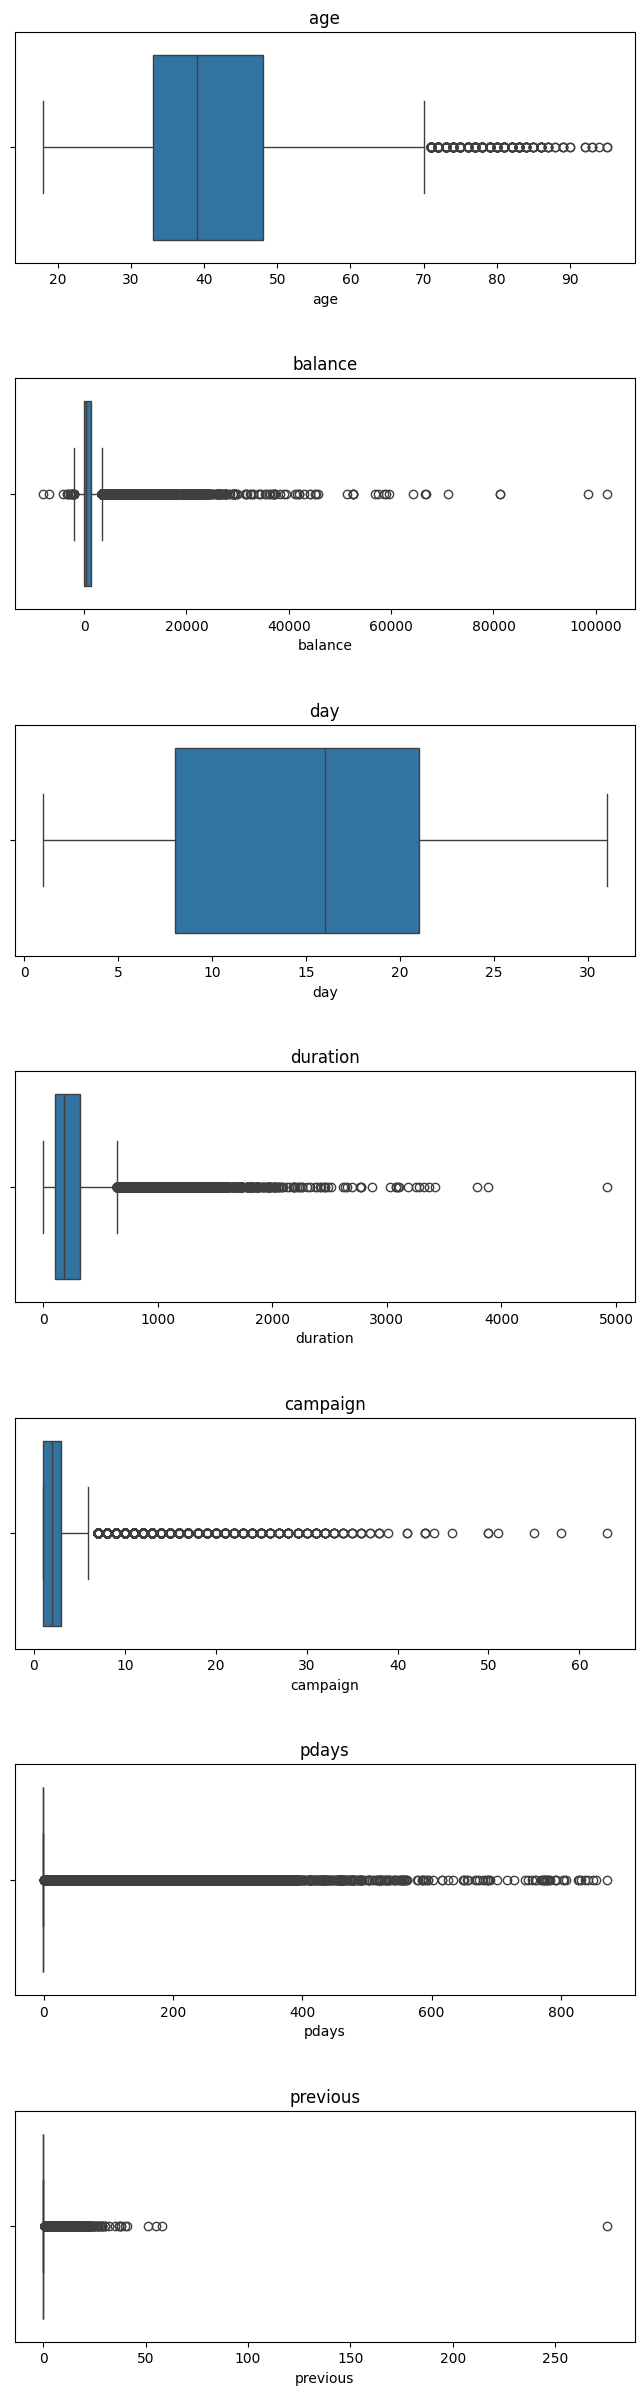

In [12]:
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

In [16]:
print(f'Tamaño del set antes de eliminar registros de edad: {df.shape}')
df = df[df['age']<=100]
print(f'Tamaño del set después de eliminar registros de edad: {df.shape}')

Tamaño del set antes de eliminar registros de edad: (45211, 17)
Tamaño del set después de eliminar registros de edad: (45211, 17)


In [17]:
print(f'Tamaño del set antes de eliminar registros de duración: {df.shape}')
df = df[df['duration']>0]
print(f'Tamaño del set después de eliminar registros de duración: {df.shape}')

Tamaño del set antes de eliminar registros de duración: (45211, 17)
Tamaño del set después de eliminar registros de duración: (45208, 17)


In [18]:
print(f'Tamaño del set antes de eliminar registros de previous: {df.shape}')
df = df[df['previous']<=100]
print(f'Tamaño del set después de eliminar registros de previous: {df.shape}')

Tamaño del set antes de eliminar registros de previous: (45208, 17)
Tamaño del set después de eliminar registros de previous: (45207, 17)


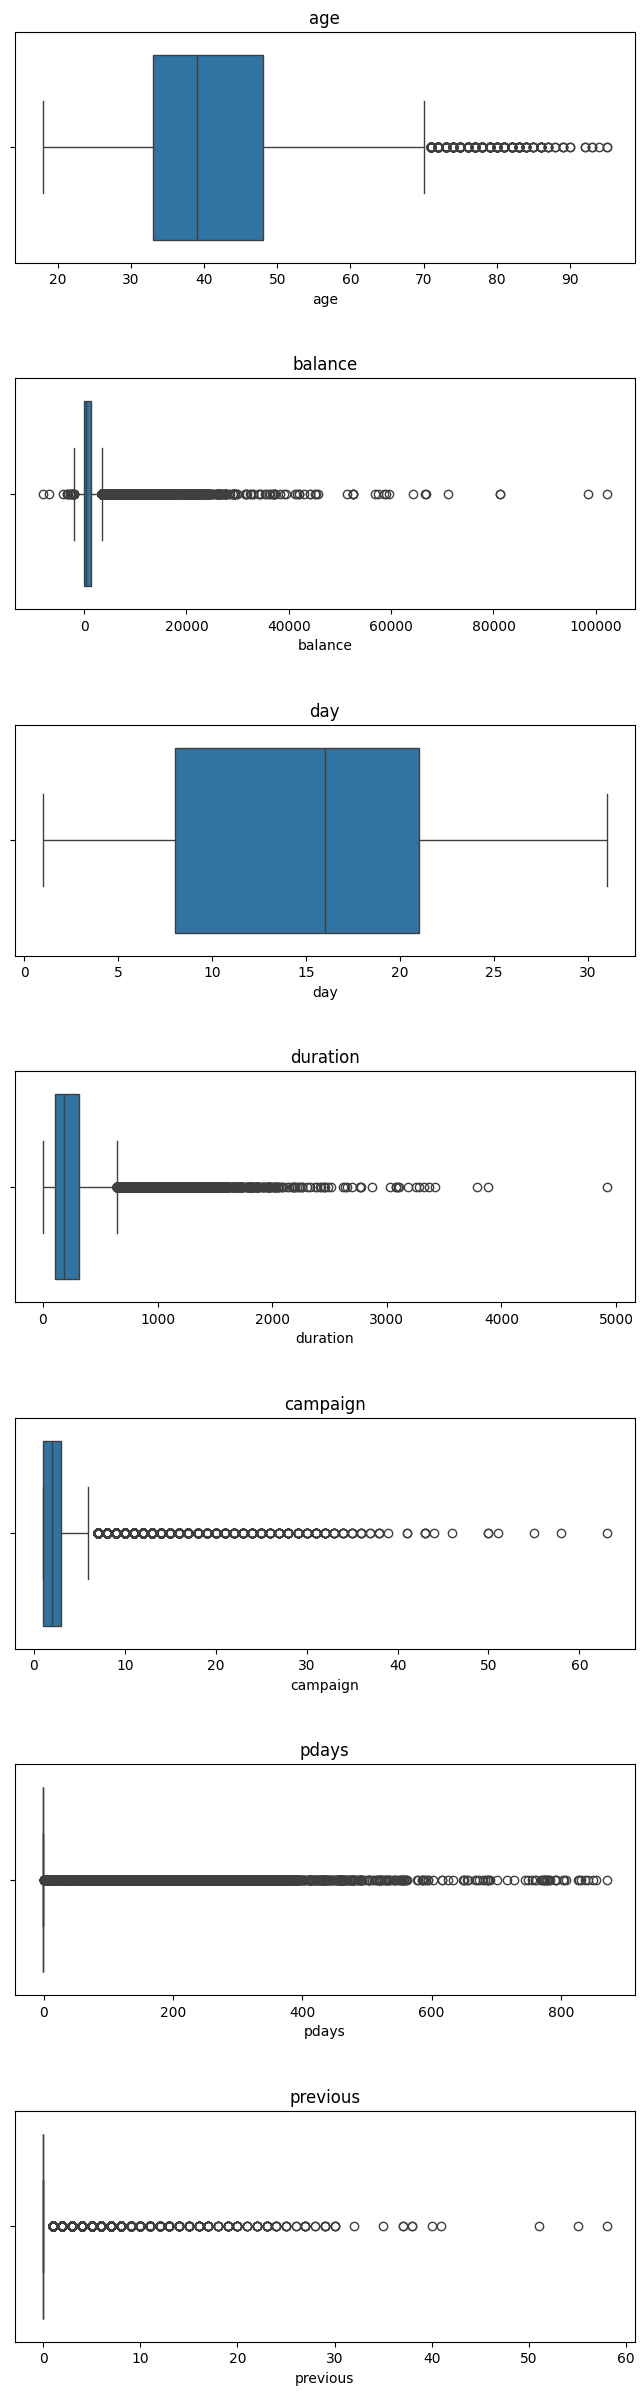

In [19]:
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

In [22]:
for col in cols_cat:
    print(df[col].value_counts())
    print('-'*20)

job
blue-collar      9732
management       9456
technician       7596
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1486
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
--------------------
marital
married     27210
single      12790
divorced     5207
Name: count, dtype: int64
--------------------
education
secondary    23200
tertiary     13300
primary       6850
unknown       1857
Name: count, dtype: int64
--------------------
default
no     44392
yes      815
Name: count, dtype: int64
--------------------
housing
yes    25127
no     20080
Name: count, dtype: int64
--------------------
loan
no     37964
yes     7243
Name: count, dtype: int64
--------------------
contact
cellular     29282
unknown      13019
telephone     2906
Name: count, dtype: int64
--------------------
month
may    13764
jul     6895
aug     6246
jun     5341
nov     3970
apr     2932
feb    